In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/louisdoukas/downloads/Combined Data File.csv')
df.columns
df.dtypes

Helper Column 2             object
Helper Column               object
year                         int64
week                         int64
date                        object
Need States                 object
Total Sales                float64
Total Trade Spend          float64
DC Amount                  float64
Store Amount on Hand       float64
Ecomm POS                  float64
Factory POS                float64
Reccomended Trade Spend    float64
dtype: object

In [2]:
names = df[df['Ecomm POS'].isnull()| df['Factory POS'].isnull()] #df['Total Sales'].isnull() | df['Total Trade Spend'].isnull()| df['DC Amount'].isnull()| df['Store Amount on Hand'].isnull()
names.head()
dfd = df.drop(names.index.tolist())

Need State 1


<Axes: xlabel='week', ylabel='Factory POS'>

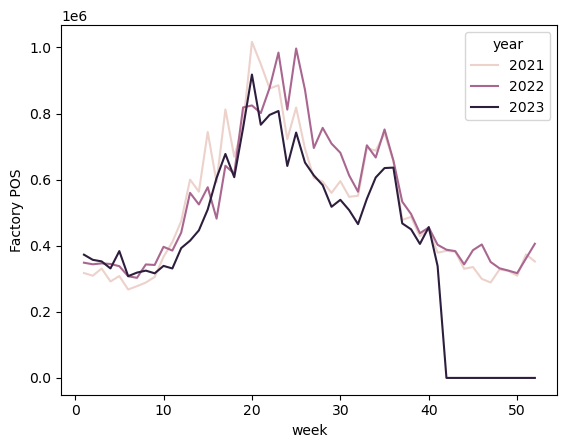

In [3]:
df1 = dfd[(dfd['Need States']=='Need State 1')]
print("Need State 1")
sns.lineplot(df1, x="week", y="Factory POS", hue='year', estimator=None)

    Helper Column 2      Helper Column  year  week        date   Need States  \
0               NaN  44200Need State 1  2021     1  2021-01-04  Need State 1   
1               NaN  44200Need State 2  2021     1  2021-01-04  Need State 2   
2               NaN  44200Need State 3  2021     1  2021-01-04  Need State 3   
3               NaN  44200Need State 4  2021     1  2021-01-04  Need State 4   
4               NaN  44200Need State 5  2021     1  2021-01-04  Need State 5   
..              ...                ...   ...   ...         ...           ...   
931             NaN  45285Need State 2  2023    52  2023-12-25  Need State 2   
932             NaN  45285Need State 3  2023    52  2023-12-25  Need State 3   
933             NaN  45285Need State 4  2023    52  2023-12-25  Need State 4   
934             NaN  45285Need State 5  2023    52  2023-12-25  Need State 5   
935             NaN  45285Need State 6  2023    52  2023-12-25  Need State 6   

     Total Sales  Total Trade Spend   D

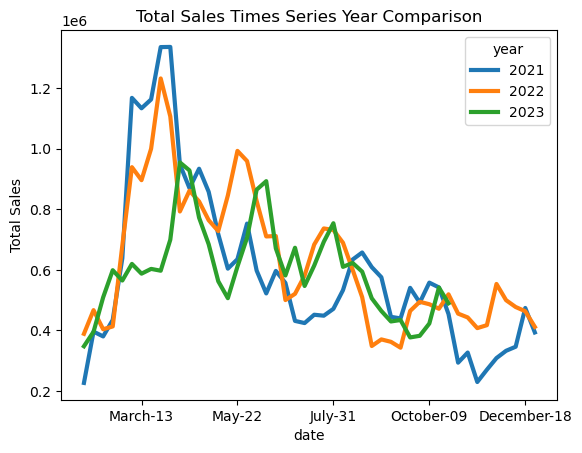

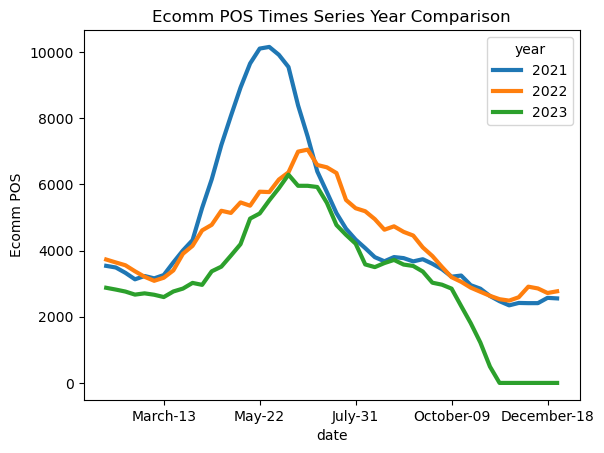

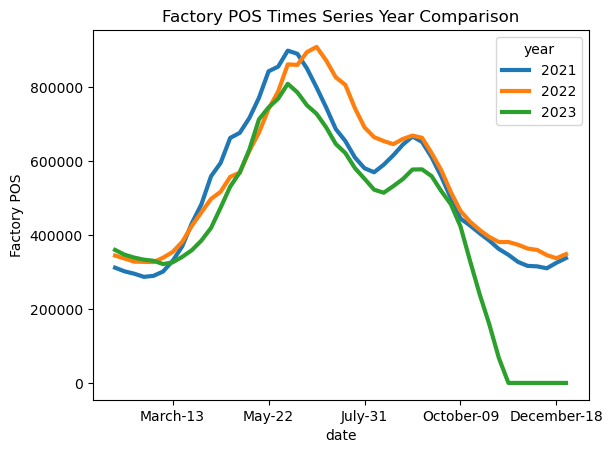

In [4]:
import numpy as np
from datetime import datetime as dt

def plotYearLines(field: str, rolling: int = 3, df: pd.DataFrame = df1):
    week_day = 1
    pivot_data = df.pivot(index='week', columns="year", values=field)
    pivot_data.index = [dt.strptime(f"2000-W{i}-{week_day}", "%G-W%V-%w").strftime('%B-%d') for i in pivot_data.index]
    print(pivot_data)
    pivot_data.rolling(rolling).mean().plot.line(lw=3)
    plt.title(f'{field} Times Series Year Comparison')
    plt.xlabel('date')
    plt.ylabel(f'{field}')

print(df)

plotYearLines('Total Sales', rolling=5)
plotYearLines('Ecomm POS', rolling=5, df=df1)
plotYearLines('Factory POS', rolling=5, df=df1)

year               2021       2022       2023
January-03    251858.25  239328.75  355815.00
January-10    510633.75  299952.00  304145.25
January-17    525278.25  367634.25  332245.50
January-24    480166.50  250038.00  718207.50
January-31    304409.25  253847.25  282531.75
February-07   460572.00  243423.75  447660.75
February-14   283466.25  328047.00  524059.50
February-21   419211.00  188490.75  273267.75
February-28   321424.50  361269.75  261685.50
March-06      285894.00  414115.50  592058.25
March-13      389976.00  324297.00  129294.00
March-20      357771.00  453584.25  621302.25
March-27      275889.75  378236.25  514803.00
April-03      354687.00  260363.25  257869.50
April-10      328035.75  323847.75  517135.50
April-17      259767.75  354027.75  394596.00
April-24      290293.50  422487.00  289171.50
May-01        319240.50  383335.50  416315.25
May-08        261920.25  557058.00  464193.00
May-15        271785.00  364514.25  375784.50
May-22        516226.50  475058.25

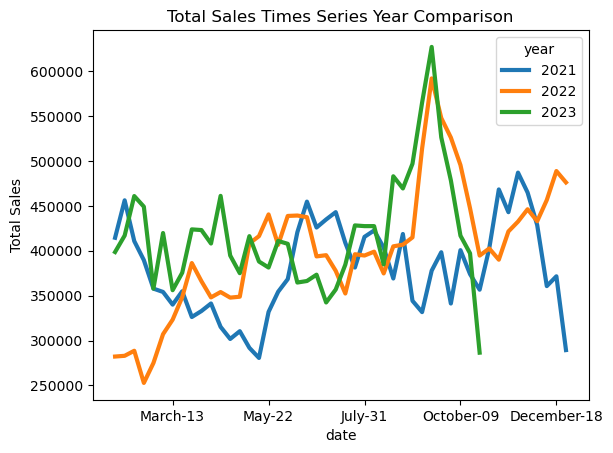

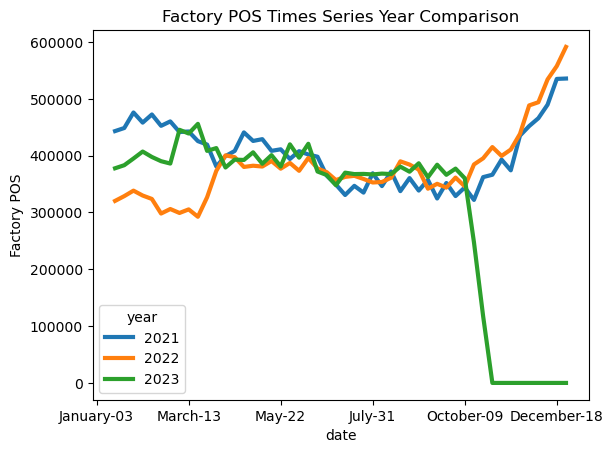

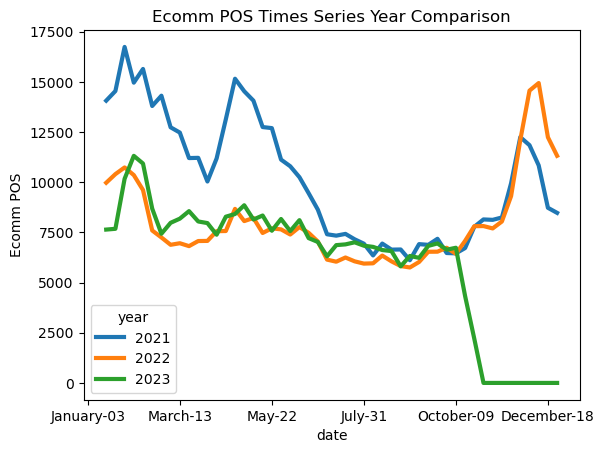

In [5]:
df2 = dfd[(dfd['Need States']=='Need State 2')]
#sns.lineplot(df2, x="week", y="Total Sales", hue='year', estimator=None)
plotYearLines('Total Sales', rolling=5, df=df2)
plotYearLines('Factory POS', rolling=3, df=df2)
plotYearLines('Ecomm POS', rolling=3, df=df2)

year               2021       2022       2023
January-03    209473.50  146636.25  323960.25
January-10    683112.00  398277.00  309346.50
January-17    627825.75  406825.50  340034.25
January-24    318566.25  297513.00  435669.00
January-31    439665.00  424525.50  320430.75
February-07   445863.75  524013.75  511701.00
February-14   334146.75  393878.25  313763.25
February-21   332299.50  168665.25  193104.75
February-28   345800.25  269997.75  145835.25
March-06      399765.00  213970.50  138671.25
March-13      251854.50  317165.25  163649.25
March-20      462864.75  465645.75  218181.75
March-27      264009.75  479124.00  385325.25
April-03      588178.50  256968.00  194237.25
April-10      463776.75  228345.00  359034.00
April-17      327388.50  289380.75  336595.50
April-24      212003.25  589102.50  483687.00
May-01        289918.50  461808.00  472200.00
May-08        229689.00  448005.00  327549.75
May-15        175822.50  218375.25  217059.75
May-22        468210.75  405483.00

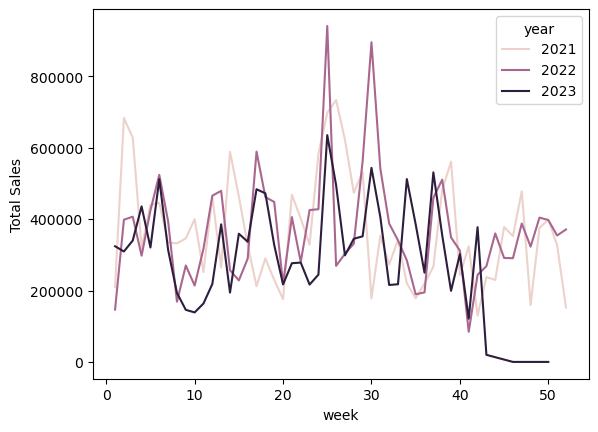

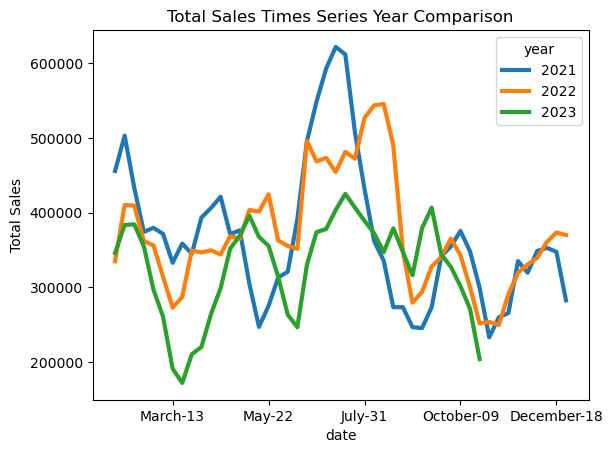

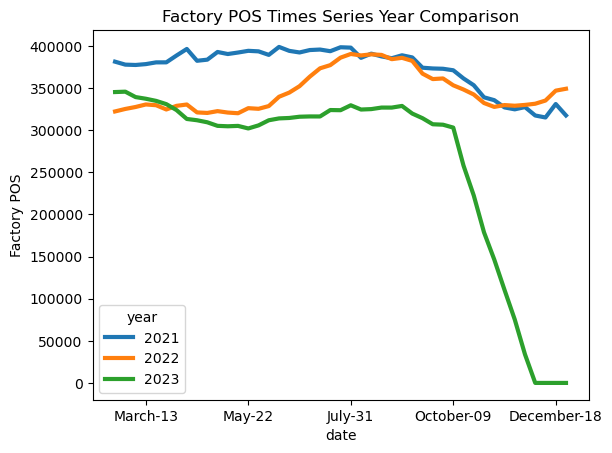

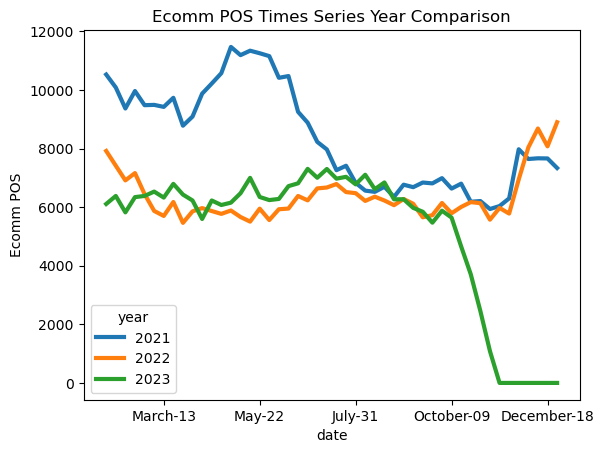

In [6]:
df3 = dfd[(dfd['Need States']=='Need State 3')]
sns.lineplot(df3, x="week", y="Total Sales", hue='year', estimator=None)
plotYearLines('Total Sales', rolling=5, df=df3)
plotYearLines('Factory POS', rolling=8, df=df3)
plotYearLines('Ecomm POS', rolling=5, df=df3)

year               2021       2022       2023
January-03    373678.50  231120.75  317171.25
January-10    597628.50  638800.50  275616.00
January-17    300238.50  573999.00  759098.25
January-24    319001.25  300548.25  354993.00
January-31    433508.25  455489.25  405148.50
February-07   640492.50  436341.00  499875.00
February-14   448128.00  448062.75  417354.75
February-21   412890.00  193704.00  266517.75
February-28   331031.25  408852.75  347949.75
March-06      461514.75  477458.25  399438.00
March-13      388106.25  236302.50  335752.50
March-20      476425.50  419783.25  453015.75
March-27      488613.75  377538.75  466305.00
April-03      475796.25  213425.25  285252.75
April-10      357441.75  290613.75  421256.25
April-17      518808.00  286107.75  367767.75
April-24      343884.00  458959.50  368679.75
May-01        460024.50  440440.50  413159.25
May-08        368431.50  570684.00  458248.50
May-15        186488.25  354081.00  291272.25
May-22        295438.50  330423.75

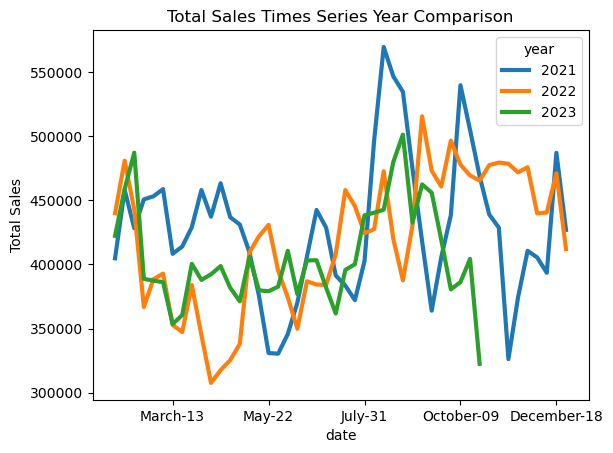

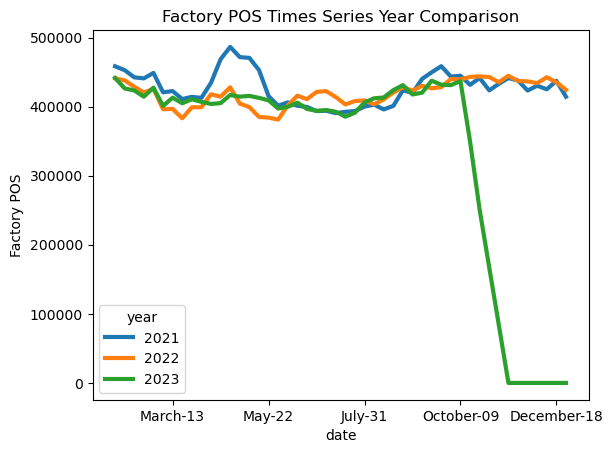

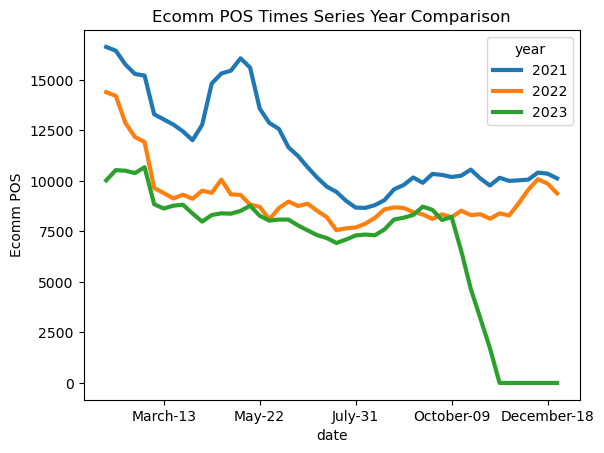

In [7]:
df4 = dfd[(dfd['Need States']=='Need State 4')]
plotYearLines('Total Sales', rolling=5, df=df4)
plotYearLines('Factory POS', rolling=5, df=df4)
plotYearLines('Ecomm POS', rolling=5, df=df4)

year               2021       2022       2023
January-03     15795.00   28734.75   89032.50
January-10     11154.75   20072.25   62028.00
January-17     10549.50   19849.50   64474.50
January-24     10443.00   23655.75   66874.50
January-31     12430.50   22807.50   66686.25
February-07    12349.50   29843.25   78102.75
February-14    19611.75   55258.50  141602.25
February-21    14553.75   32664.00   66030.75
February-28    18550.50   37790.25   72634.50
March-06       40655.25   71468.25  124755.75
March-13       37981.50   43072.50   75292.50
March-20       71428.50   53145.00   85533.00
March-27      100258.50   88083.75  137568.00
April-03      134664.75   67195.50  103520.25
April-10      357144.75  132243.00  314976.75
April-17      191838.00   91773.00  271800.00
April-24      237999.75  226299.00  322632.00
May-01        139817.25  167946.75  274773.00
May-08        312561.00  470982.75  473654.25
May-15        518168.25  372768.75  501765.00
May-22        513900.75  344436.00

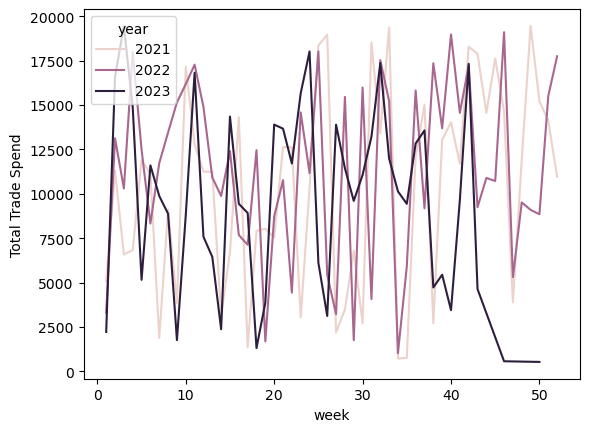

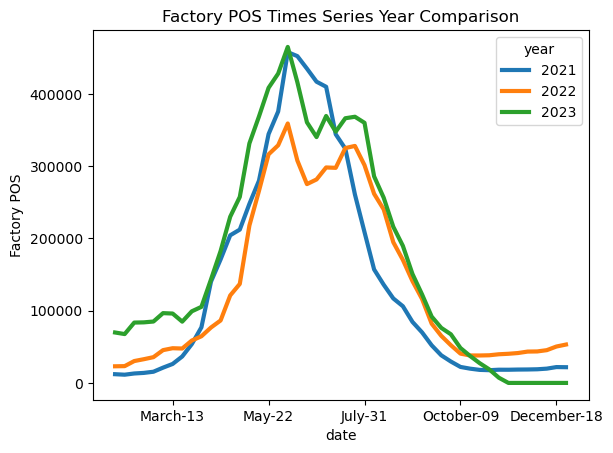

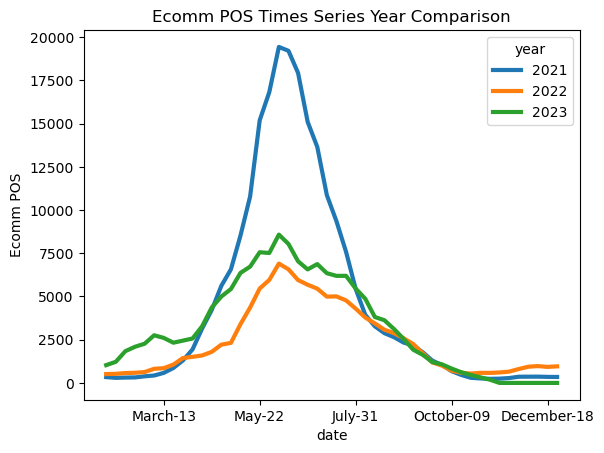

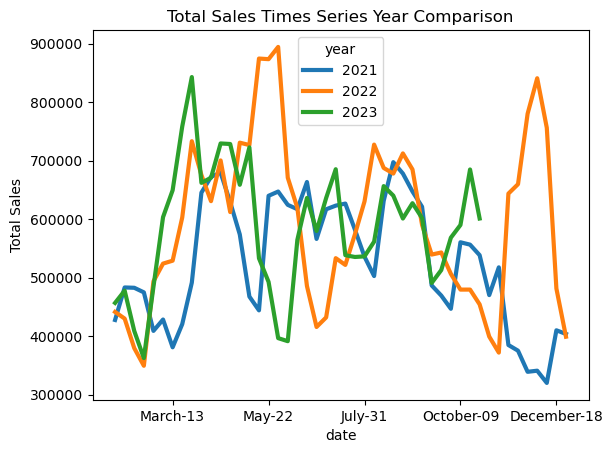

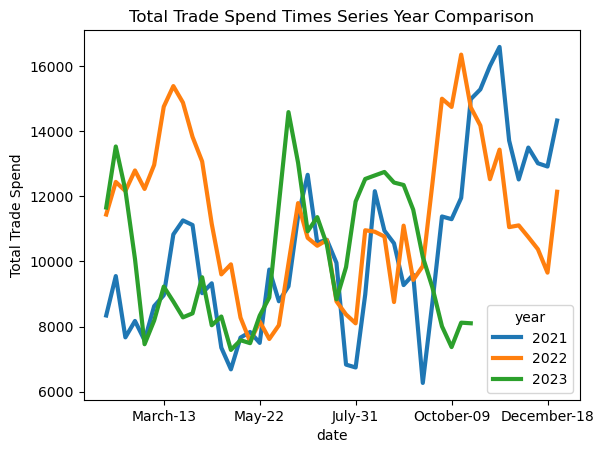

In [8]:
df5 = dfd[(dfd['Need States']=='Need State 5')]
sns.lineplot(df5, x="week", y="Total Trade Spend", hue='year', estimator=None)
plotYearLines('Factory POS', rolling=5, df=df5)
plotYearLines('Ecomm POS', rolling=5, df=df5)
plotYearLines('Total Sales', rolling=5, df=df5)
plotYearLines('Total Trade Spend', rolling=5, df=df5)

year              2021      2022      2023
January-03     6929.25   7405.50   6918.00
January-10     6226.50   9000.75   6349.50
January-17     7128.75   8354.25   5749.50
January-24     6423.75   8982.75   5434.50
January-31     6801.00   8905.50  12224.25
February-07    6545.25   6419.25   6025.50
February-14    5718.00   6573.00   6106.50
February-21    7878.00   6710.25   5668.50
February-28    6035.25   8185.50   6065.25
March-06       5799.00   6075.75   5964.75
March-13       5229.00   5880.75   5513.25
March-20       5707.50   6043.50   6131.25
March-27       6843.00   6873.00   5236.50
April-03       5844.75   5549.25   5472.75
April-10       8559.75   6033.75   4804.50
April-17       7908.75   5556.75   8177.25
April-24      10527.00   8270.25   7598.25
May-01        11718.00   6912.00   7570.50
May-08        11941.50   7340.25   7011.75
May-15        16122.75   9194.25   8346.00
May-22        14102.25   6375.00   7911.00
May-29        13658.25   9875.25   7395.00
June-05    

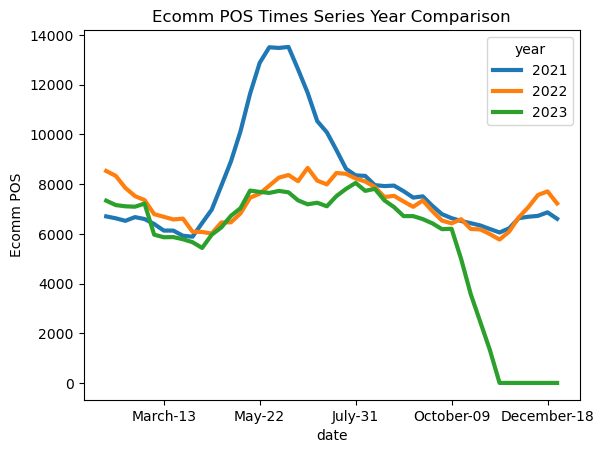

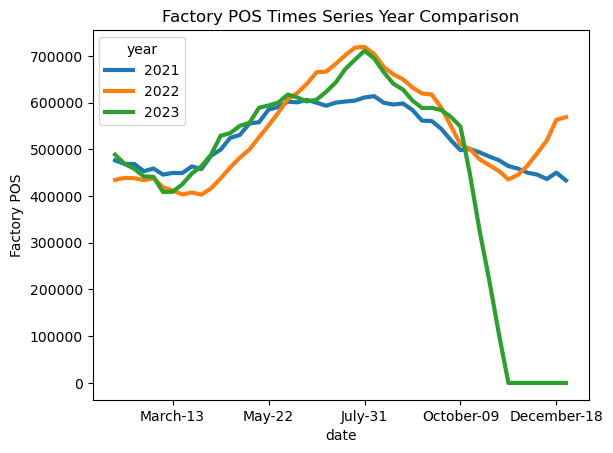

In [9]:
df6 = dfd[(dfd['Need States']=='Need State 6')]
plotYearLines('Ecomm POS', rolling=5, df=df6)
plotYearLines('Factory POS', rolling=5, df=df6)

<Axes: xlabel='Factory POS', ylabel='Reccomended Trade Spend'>

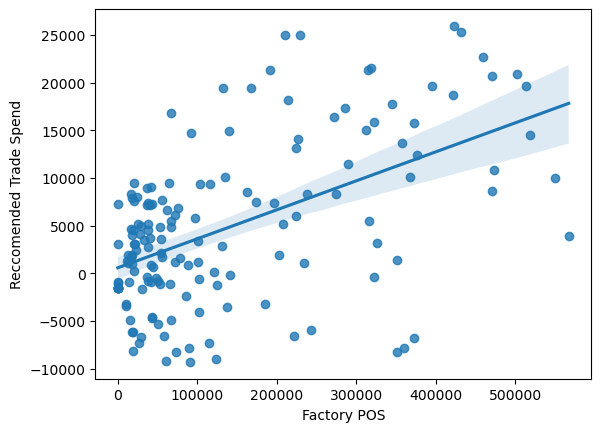

In [10]:
# Linear Regression for NS5 only
sns.regplot(df5, y='Reccomended Trade Spend', x='Factory POS')

<Axes: xlabel='DC Amount', ylabel='Ecomm POS'>

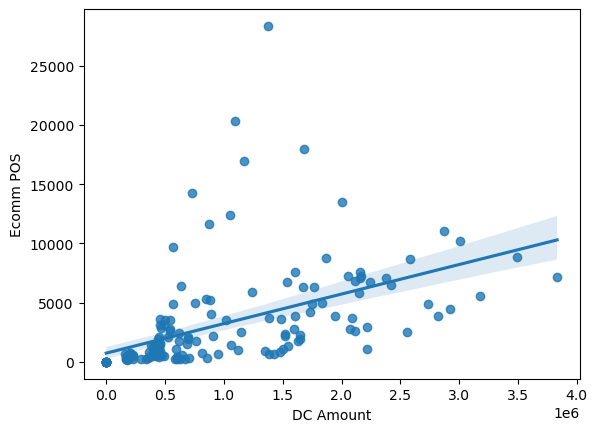

In [11]:
sns.regplot(df5, x='DC Amount', y='Ecomm POS')

<Axes: xlabel='DC Amount', ylabel='Factory POS'>

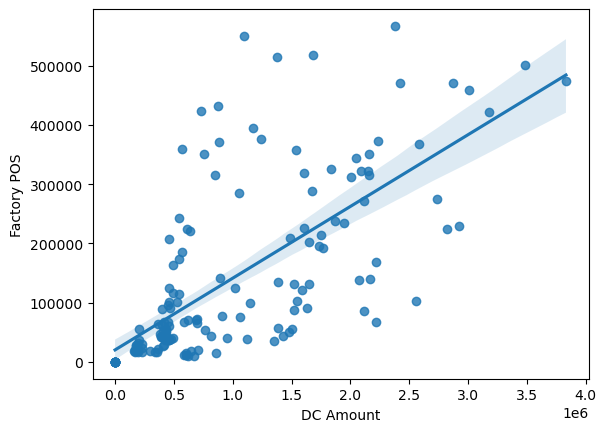

In [12]:
sns.regplot(df5, y='Factory POS', x='DC Amount')

<Axes: xlabel='Total Trade Spend', ylabel='Factory POS'>

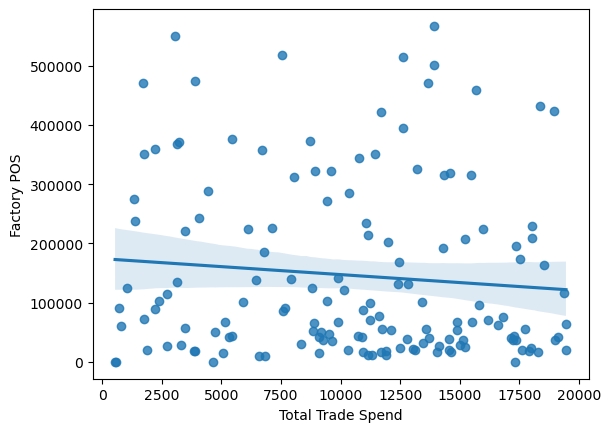

In [13]:
sns.regplot(df5, x='Total Trade Spend', y='Factory POS')

<Axes: xlabel='week', ylabel='Ecomm POS'>

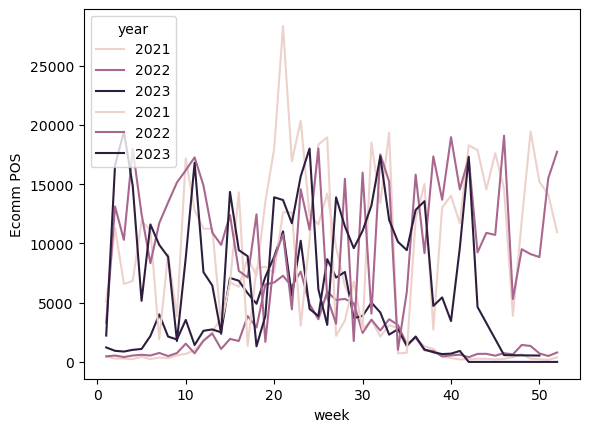

In [14]:
sns.lineplot(df5, x="week", y="Ecomm POS", hue='year', estimator=None)
sns.lineplot(df5, x="week", y="Total Trade Spend", hue='year', estimator=None)